In [1]:
import glob
import json
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_to_doi = 'csd/matched_CIFs_and_DOI'



In [3]:
isotherms = glob.glob(os.path.join(path_to_doi, '*/', '*.json'))


In [4]:
multi_component_isotherms = []
adsorbate_dict = defaultdict(lambda:0)

for count, iso in enumerate(isotherms):
    with open(iso, 'r') as f:
        data = json.load(f)
    adsorbates = data['adsorbates']
    if len(adsorbates) > 1:
        multi_component_isotherms.append(iso)
    else:
        adsorbate_name = data['adsorbates'][0]['name']
        adsorbate_dict[adsorbate_name] += 1



In [5]:
dict(adsorbate_dict)

{'Carbon Dioxide': 1539,
 'Methane': 778,
 'Hydrogen': 997,
 'Nitrogen': 1366,
 'Ethene': 109,
 'Ethane': 91,
 'Oxygen': 157,
 'Methanol': 157,
 'Water': 172,
 'Ethanol': 98,
 'Benzene': 50,
 'Acetylene': 132,
 'Nitric oxide': 17,
 'N-propane': 57,
 'Argon': 118,
 'Carbon monoxide': 56,
 'Isobutane': 8,
 '2-Methylbutane': 3,
 'N-Butane': 15,
 'N-Pentane': 5,
 'Tetrahydrofuran': 2,
 'Deuterium': 6,
 'Acetone': 16,
 'P-Xylene': 27,
 'M-Xylene': 4,
 '1-Propanol': 31,
 'Trichloromethane': 1,
 'Diethyl ether': 1,
 'N-Hexane': 19,
 'Toluene': 20,
 '2-Propanol': 8,
 'Propene': 25,
 'Cyclohexane': 41,
 'Acetonitrile': 15,
 'Helium': 1,
 'Dimethyl ether': 8,
 'Mercury Dichloride': 4,
 'Hydrogen sulfide': 2,
 '1-Butanol': 14,
 'Xenon': 10,
 'Sulfur dioxide': 5,
 'Acetaldehyde': 1,
 'Styrene': 1,
 'Ethylbenzene': 7,
 'Ammonia': 2,
 '1-Pentanol': 2,
 'Pyridine': 1,
 'Tert-Butanol': 1,
 'Isobutanol': 1,
 'O-Xylene': 1,
 'Sulfur Hexafluoride': 2,
 'Carbon Tetrachloride': 1,
 'Neon': 2,
 'Krypton': 3

<ipython-input-18-b8dbfc63c5b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adsorbate_plot.sort_values(by='Count', inplace=True, ascending=False)


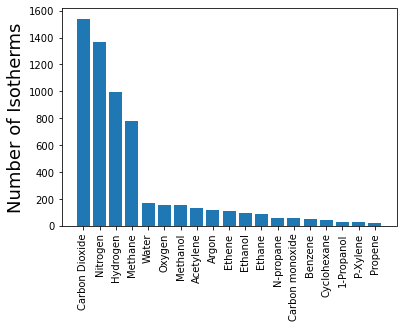

In [18]:
df_adsorbate_dict = pd.DataFrame.from_dict(dict(adsorbate_dict),  orient='index').reset_index()
df_adsorbate_dict.rename(columns={'index':'Adsorbate', 0:'Count'}, inplace=True)

df_adsorbate_plot = df_adsorbate_dict[df_adsorbate_dict['Count'] > 20]
df_adsorbate_plot.sort_values(by='Count', inplace=True, ascending=False)

fig, ax = plt.subplots()
ax.bar(df_adsorbate_plot['Adsorbate'], df_adsorbate_plot['Count'])
plt.xticks(rotation=90)
ax.set_ylabel('Number of Isotherms', fontsize=18)
fig.savefig('/home/tdpham/software/Compare_experimental_simulated_isotherms/figures/Isotherm_distribution.png', dpi=600, bbox_inches='tight')

In [12]:
def get_isotherm_json(fname, interested_adsorbates=['Methane', 'Hydrogen', 'Nitrogen', 'Carbon Dioxide']):
    f = open(fname)
    data = json.load(f)
    f.close()

    adsorbates = data['adsorbates']
    if len(adsorbates) == 1:
        adsorbate_name = data['adsorbates'][0]['name']
    else:
        print('Multiple adsorbates in {}'.format(fname))
        return 'Error'
    
    if adsorbate_name in interested_adsorbates:
        
        adsorbent_name = data['adsorbent']['name']
        units = data['adsorptionUnits']
        isotherm_data = data['isotherm_data']
        pressure_unit = data['pressureUnits']
        temperature = data['temperature']
        pressures = [item['pressure'] for item in isotherm_data]
        pmin = min(pressures)
        pmax = max(pressures)

        uptakes = [item['species_data'][0]['adsorption'] for item in isotherm_data]
        umin = min(uptakes)
        umax = max(uptakes)

        adsorption_units = data['adsorptionUnits']

        return [adsorbent_name, adsorbate_name, temperature, pressure_unit, adsorption_units, pmin, umin, pmax, umax]
    else:
        return 'Error'

In [13]:
get_isotherm_json('/home/tdpham/software/Compare_experimental_simulated_isotherms/simulated_isotherms/N2/10.1002chem.200902104/10.1002chem.200902104.Isotherm7.json')

['YO-MOF',
 'Nitrogen',
 77,
 'bar',
 'cm3(STP)/g',
 0.00264719,
 0.00264719,
 0.931812,
 291.923]

In [18]:
dois = glob.glob(path_to_doi + '/*/')
for doi in dois:
    isotherms = sorted(glob.glob(doi + '/*json'))
    cifs = glob.glob(doi + '/*.cif')
    cifs = [i.split('/')[-1] for i in cifs]
    cifs = [i[:-4] for i in cifs]
    ncifs = len(cifs)
    for iso in isotherms:
        results = get_isotherm_json(iso)
        if results == 'Error':
            continue
        else:
            with open('isotherm_data.csv', 'a') as f:
                doi = iso.split('/')[-2]
                iso_name = iso.split('/')[-1]
                f.write('{},{},{},{},{},{},{},{},{},{},{},{},{}\n'.format(
                    doi,
                    iso_name,
                    results[0],
                    results[1],
                    results[2],
                    results[3],
                    results[4],
                    results[5],
                    results[6],
                    results[7],
                    results[8],
                    ncifs,
                    '/'.join(cifs)               

                ))


Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1021jacs.9b10923/10.1021jacs.9b10923.Isotherm1.json
Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1016j.molstruc.2017.04.099/10.1016j.molstruc.2017.04.099.Isotherm1.json
Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1021jacs.8b07563/10.1021jacs.8b07563.Isotherm1.json
Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1021jacs.8b07563/10.1021jacs.8b07563.Isotherm2.json
Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1021acsami.8b13362/10.1021acsami.8b13362.Isotherm1.json
Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1021acsami.8b13362/10.1021acsami.8b13362.Isotherm2.json
Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1021acsami.8b13362/10.1021acsami.8b13362.Isotherm3.json
Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1021acsami.8b13362/10.1021acsami.8b13362.Isotherm4.json
Multiple adsorbates in csd/matched_CIFs_and_DOI/10.1021acsami.8b13362/10.1021acsami.8b13362.Isotherm5.json
Multiple adsorbates in csd/matche